In [1]:
%matplotlib inline

import datetime as dt
import glob
import os
import warnings

import ipywidgets as widgets
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import Image, Markdown, clear_output, display

import app_utils as au

warnings.simplefilter("ignore")

In [2]:
def display_forecast(b):
    with output:
        clear_output()

        # Get user options
        year = years.value

        # Make forecast components and PDF
        au.make_forecast(year)

        # Display results in app
        today = dt.datetime.today()
        today = today.strftime("%B %d. %Y")

        display(Markdown(f"## Forecast issued {today}"))
        display(
            Markdown(
                "Lake water quality forecasts are for the **western basin of Lake Vansjø "
                "(Vanemfjorden)**, and aim to predict ecological status according to the Water "
                "Framework Directive (WFD). Four variables are predicted: concentrations of "
                "**total phosphorus**, **chlorophyll-a** & lake **colour**, and biovolume of **cyanobacteria**. "
                "A [guide to interpreting these forecasts](https://github.com/icra/WATExR/blob/master/Norway_Morsa/guidance_docs/GuidanceDoc_InterpretingLakeForecast.pdf) "
                "accompanies this bulletin, and includes a short description of the models used "
                " to produce the forecasts."
            )
        )
        display(
            Markdown("Colour codes used in the forecasts are shown in the table below.")
        )
        display(Image("./images/wq_confidence_table.png", width=300))
        display(Markdown("_______________________"))
        display(
            Markdown(
                f"## Lake chemistry and ecology forecast for May – October, {year}"
            )
        )
        display(Markdown("### Total phosphorus (growing season mean)"))
        display(Image("./images/tp_forecast_summary.png", width=800))
        display(
            Markdown(
                "*Click [here](https://github.com/icra/WATExR/blob/master/Norway_Morsa/BayesianNetwork/Hindcast_stats_plots/Timeseries_gof/timeseries_operationalModel_TP.png) "
                "for a plot summarising historic skill"
            )
        )
        display(Markdown("### Chlorophyll-a (growing season mean)"))
        display(Image("./images/chla_forecast_summary.png", width=800))
        display(
            Markdown(
                "*Click [here](https://github.com/icra/WATExR/blob/master/Norway_Morsa/BayesianNetwork/Hindcast_stats_plots/Timeseries_gof/timeseries_operationalModel_chla.png) "
                "for a plot summarising historic skill"
            )
        )
        display(Markdown("### Cyanobacteria (growing season maximum)"))
        display(Image("./images/cyano_forecast_summary.png", width=800))
        display(
            Markdown(
                "*Click [here](https://github.com/icra/WATExR/blob/master/Norway_Morsa/BayesianNetwork/Hindcast_stats_plots/Timeseries_gof/timeseries_operationalModel_cyano.png) "
                "for a plot summarising historic skill"
            )
        )
        display(Markdown("### Colour (growing season mean)"))
        display(Image("./images/colour_forecast_summary.png", width=800))
        display(
            Markdown(
                "*Click [here](https://github.com/icra/WATExR/blob/master/Norway_Morsa/BayesianNetwork/Hindcast_stats_plots/Timeseries_gof/timeseries_operationalModel_colour.png) "
                "for a plot summarising historic skill"
            )
        )
        display(
            Markdown(
                "¹**RMSE:** Root mean square error. An indication of the likely size of error between "
                "forecasted and observed values"
            )
        )
        display(
            Markdown(
                "²**Classification error:** percent of time the model predicted the class "
                "incorrectly during the historic assessment period"
            )
        )
        display(
            Markdown(
                "³**MCC:** Matthews' correlation coefficient. A value of 1 is a perfect fit to "
                "historic observations, 0 no better than a random model"
            )
        )
        display(Markdown(f"_______________________"))
        display(
            Markdown(
                "**Disclaimer:** Although water quality models have generally good historic "
                "skill, if climatic and/or management conditions change relative to the "
                "historic period, forecasts may be inaccurate even when the confidence "
                "level is reported as ‘High’. Data used to assess historic skill are from the "
                "main body of Vanemfjorden and do not necessarily reflect conditions at the "
                "more popular bathing beaches. Historically, toxic algal blooms occurred more "
                "frequently at these bathing spots and are therefore likely to be "
                "underpredicted by these forecasts."
            )
        )

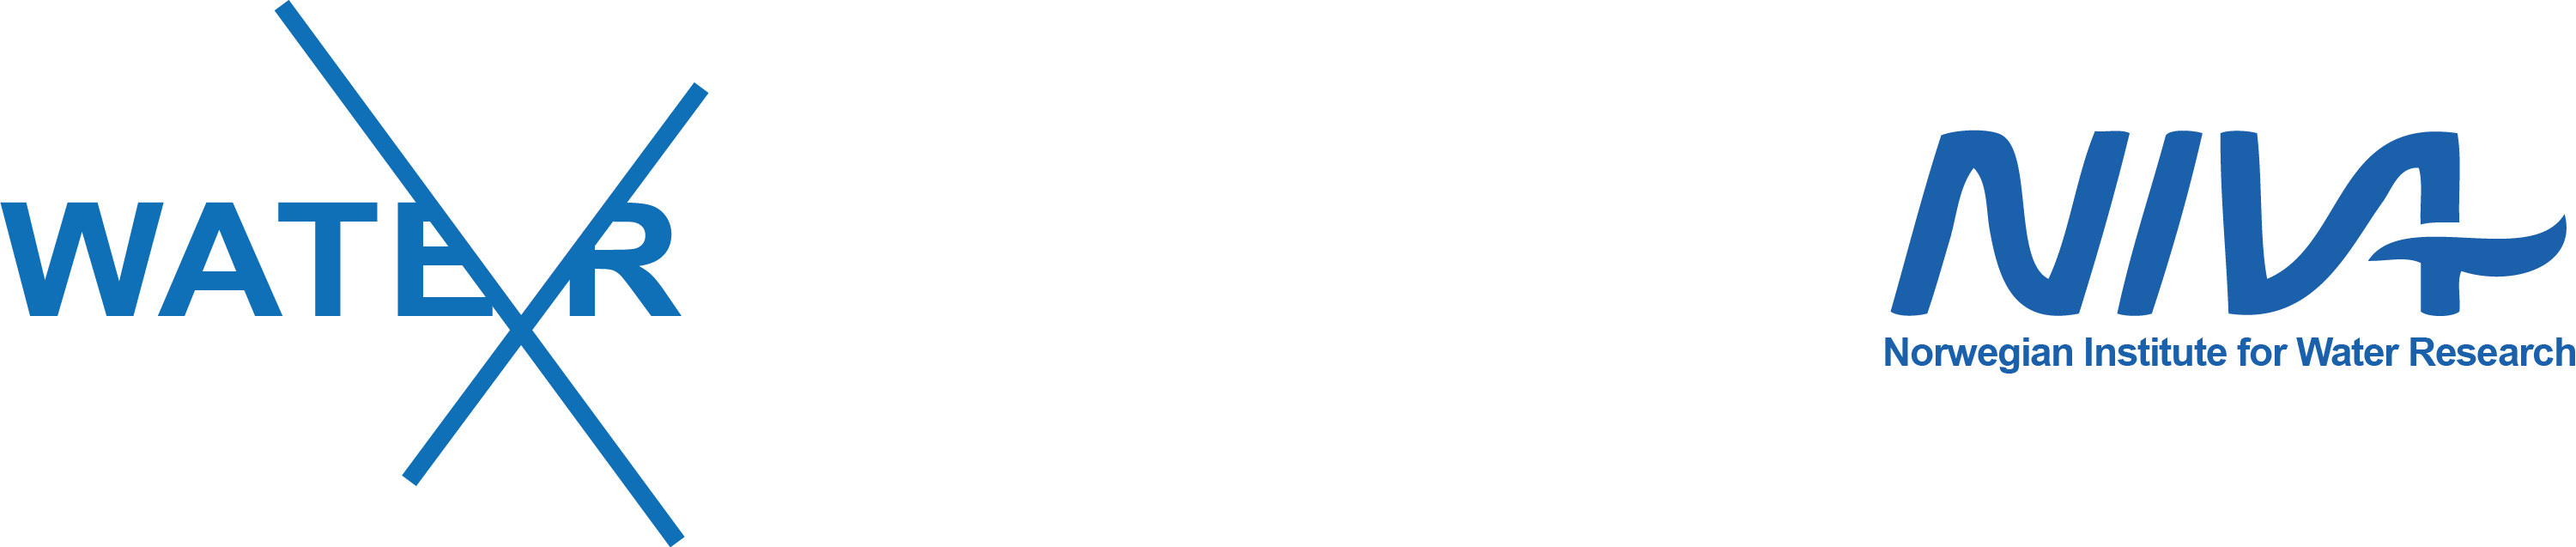

In [3]:
display(Image("./images/watexr_niva_logo.png", width=800))

# WATExR: Seasonal forecasts

Forecasts are issued by [NIVA](https://www.niva.no/) as part of the [ERA4CS](http://www.jpi-climate.eu/ERA4CS)-funded [WATExR](https://watexr.eu/) project.

## Select year of interest

Specify your **year** of interest using the drop-down list below and click the **Start** button.

In [4]:
style = {"description_width": "initial"}

cur_year = dt.datetime.today().year
years = widgets.Dropdown(
    options=range(2001, cur_year + 1),
    value=cur_year,
    description="Select year:",
    disabled=False,
)

start = widgets.Button(
    description="Start", disabled=False, style={"font_weight": "bold"}
)

output = widgets.Output()

display(years, start, output)

start.on_click(display_forecast)

Dropdown(description='Select year:', index=19, options=(2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, …

Button(description='Start', style=ButtonStyle(font_weight='bold'))

Output()